# Signal e- Run 04 Analysis

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
import pandas as pd
import pickle as pkl
from datetime import datetime
from dateutil import parser
import os
import re
from sys import getsizeof

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['axes.axisbelow'] = True

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.io as pio
from plotly import subplots
from plotly import tools
init_notebook_mode(True)

from hallprobecalib import hpc_ext_path
from hallprobecalib.hpcplots import scatter2d,scatter3d,histo

from mu2e import mu2e_ext_path
from mu2e.dataframeprod import DataFrameMaker
from mu2e.mu2eplots import mu2e_plot, mu2e_plot3d
from mu2e.loadtrajectories import LoadTrajectory

In [3]:
data_dir = "/home/ckampa/Coding/Mu2E_Extras/trajectory/run04/"
plot_dir = "/home/ckampa/Coding/Mu2E_Extras/plots/trajectory/run04/differences_histos/"
run_name = "trajectory_run04_"

## Easy Load  for Single Event Data File(s)

In [5]:
particle_num = 3

In [6]:
files_finder = re.compile(f".*{particle_num:03d}_Bshift.*")

In [7]:
#finder.findall(os.listdir(data_dir)[0])

In [8]:
%timeit particle_files = sorted([data_dir+f for f in os.listdir(data_dir) if files_finder.match(f)])

312 µs ± 3.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
particle_files = sorted([data_dir+f for f in os.listdir(data_dir) if files_finder.match(f)])

In [10]:
particle_files

['/home/ckampa/Coding/Mu2E_Extras/trajectory/run04/trajectory_run04_003_Bshift-25mm-NONE.p',
 '/home/ckampa/Coding/Mu2E_Extras/trajectory/run04/trajectory_run04_003_Bshift-25mm-X.p',
 '/home/ckampa/Coding/Mu2E_Extras/trajectory/run04/trajectory_run04_003_Bshift-25mm-Y.p',
 '/home/ckampa/Coding/Mu2E_Extras/trajectory/run04/trajectory_run04_003_Bshift-25mm-Z.p']

In [11]:
f"{particle_num:03d}"

'003'

In [12]:
df = []
for file in particle_files:
    df.append(pd.read_pickle(file).iloc[::10,:])

In [13]:
len(df)

4

In [14]:
df = pd.concat(df, join='outer', ignore_index=True, sort = False)

In [15]:
df

,X,Y,Z,Vx,Vy,Vz,time,event,E0,EF,B_shift
0,15.276367,56.899105,5855.554199,1.387909e+11,2.735948e+09,2.657122e+11,0.000000e+00,3,105.001243,105.001244,NONE
1,29.110437,58.052350,5882.124653,1.374851e+11,2.027748e+10,2.656314e+11,1.000125e-10,3,105.001243,105.001244,NONE
2,42.703911,60.940768,5908.687384,1.339931e+11,3.738937e+10,2.655584e+11,2.000250e-10,3,105.001243,105.001244,NONE
3,55.842722,65.507948,5935.243369,1.284119e+11,5.380564e+10,2.654971e+11,3.000375e-10,3,105.001243,105.001244,NONE
4,68.324086,71.671781,5961.793965,1.208696e+11,6.927898e+10,2.654512e+11,4.000500e-10,3,105.001243,105.001244,NONE
5,79.959445,79.326509,5988.340878,1.115219e+11,8.358428e+10,2.654240e+11,5.000625e-10,3,105.001243,105.001244,NONE
6,90.577055,88.345078,6014.886129,1.005489e+11,9.652123e+10,2.654184e+11,6.000750e-10,3,105.001243,105.001244,NONE
7,100.024213,98.581754,6041.432008,8.815065e+10,1.079169e+11,2.654370e+11,7.000875e-10,3,105.001243,105.001244,NONE
8,108.169074,109.874940,6067.981033,7.454347e+10,1.176272e+11,2.654816e+11,8.001000e-10,3,105.001243,105.001244,NONE
9,114.902083,122.050122,6094.535890,5.995600e+10,1.255382e+11,2.655538e+11,9.001125e-10,3,105.001243,105.001244,NONE


In [ ]:
grouped = df.groupby("")

**This feature has been integrated into the Mu2E python package.**

## Test Mu2E Feature (load event df)

In [16]:
from mu2e.loadtrajectories import LoadTrajectory

In [31]:
df = LoadTrajectory(run=4, event=3, form='raw', stride=10)

In [32]:
df

,X,Y,Z,Vx,Vy,Vz,time,event,E0,EF,B_shift
0,15.276367,56.899105,5855.554199,1.387909e+11,2.735948e+09,2.657122e+11,0.000000e+00,3,105.001243,105.001244,NONE
1,29.110437,58.052350,5882.124653,1.374851e+11,2.027748e+10,2.656314e+11,1.000125e-10,3,105.001243,105.001244,NONE
2,42.703911,60.940768,5908.687384,1.339931e+11,3.738937e+10,2.655584e+11,2.000250e-10,3,105.001243,105.001244,NONE
3,55.842722,65.507948,5935.243369,1.284119e+11,5.380564e+10,2.654971e+11,3.000375e-10,3,105.001243,105.001244,NONE
4,68.324086,71.671781,5961.793965,1.208696e+11,6.927898e+10,2.654512e+11,4.000500e-10,3,105.001243,105.001244,NONE
5,79.959445,79.326509,5988.340878,1.115219e+11,8.358428e+10,2.654240e+11,5.000625e-10,3,105.001243,105.001244,NONE
6,90.577055,88.345078,6014.886129,1.005489e+11,9.652123e+10,2.654184e+11,6.000750e-10,3,105.001243,105.001244,NONE
7,100.024213,98.581754,6041.432008,8.815065e+10,1.079169e+11,2.654370e+11,7.000875e-10,3,105.001243,105.001244,NONE
8,108.169074,109.874940,6067.981033,7.454347e+10,1.176272e+11,2.654816e+11,8.001000e-10,3,105.001243,105.001244,NONE
9,114.902083,122.050122,6094.535890,5.995600e+10,1.255382e+11,2.655538e+11,9.001125e-10,3,105.001243,105.001244,NONE


In [35]:
df = LoadTrajectory(run=5, subrun=1, event=0)

In [36]:
df

,X,Y,Z,Vx,Vy,Vz,time,event,E0,EF
0,-28.129639,-42.771976,5988.847168,-2.757038e+11,1.166771e+11,-1.572453e+10,0.000000e+00,0,105.001243,105.001263
1,-56.358147,-32.849884,5987.265666,-2.880651e+11,8.148060e+10,-1.590000e+10,1.000125e-10,0,105.001243,105.001263
2,-85.600755,-26.516482,5985.667326,-2.959562e+11,4.500506e+10,-1.605878e+10,2.000250e-10,0,105.001243,105.001263
3,-115.403425,-23.871541,5984.054557,-2.992496e+11,7.816188e+09,-1.618610e+10,3.000375e-10,0,105.001243,105.001263
4,-145.302928,-24.957572,5982.431232,-2.978893e+11,-2.950825e+10,-1.626752e+10,4.000500e-10,0,105.001243,105.001263
5,-174.834051,-29.759081,5980.802644,-2.918917e+11,-6.638750e+10,-1.628906e+10,5.000625e-10,0,105.001243,105.001263
6,-203.536847,-38.202715,5979.175452,-2.813455e+11,-1.022469e+11,-1.623743e+10,6.000750e-10,0,105.001243,105.001263
7,-230.963809,-50.158324,5977.557608,-2.664107e+11,-1.365267e+11,-1.610014e+10,7.000875e-10,0,105.001243,105.001263
8,-256.686877,-65.440903,5975.958261,-2.473156e+11,-1.686911e+11,-1.586571e+10,8.001000e-10,0,105.001243,105.001263
9,-280.304144,-83.813395,5974.387653,-2.243541e+11,-1.982364e+11,-1.552384e+10,9.001125e-10,0,105.001243,105.001263


In [37]:
# try bad run
df = LoadTrajectory(run=2, subrun=1, event=0)

Exception: Please enter a valid run number in [4, 5].

Seems to be working for the most recent runs (only good runs so far). Time to commit!

## Find differences along entire track
- For each event, find delta x, y, z, xy plane, total distance for each field component for each Bshift.

In [4]:
run = 4; event = 0#0;

In [7]:
df = LoadTrajectory(run=run, event=event, form="raw", stride=10)

In [8]:
grouped = df.groupby("B_shift")

In [9]:
grouped.describe()

E0                                                                \
         count        mean           std         min         25%         50%   
B_shift                                                                        
NONE     265.0  105.001243  1.423774e-14  105.001243  105.001243  105.001243   
X        266.0  105.001243  2.847528e-14  105.001243  105.001243  105.001243   
Y        265.0  105.001243  1.423774e-14  105.001243  105.001243  105.001243   
Z        265.0  105.001243  1.423774e-14  105.001243  105.001243  105.001243   

                                    EF                  ...       \
                75%         max  count        mean      ...        
B_shift                                                 ...        
NONE     105.001243  105.001243  265.0  105.001246      ...        
X        105.001243  105.001243  266.0  105.001246      ...        
Y        105.001243  105.001243  265.0  105.001246      ...        
Z        105.001243  105.001243  265.0  105.001246      ...        

                    Z                 time                                   \
                  75%           max  count          mean           std  min   
B_shift                                                                       
NONE     10389.146744  11980.366851  265.0  1.320165e-08  7.665269e-09  0.0   
X        10398.864614  11991.691224  266.0  1.325166e-08  7.694141e-09  0.0   
Y        10391.662665  11982.063409  265.0  1.320165e-08  7.665269e-09  0.0   
Z        10389.968378  11982.134116  265.0  1.320165e-08  7.665269e-09  0.0   

                                                                 
                  25%           50%           75%           max  
B_shift                                                          
NONE     6.600825e-09  1.320165e-08  1.980248e-08  2.640330e-08  
X        6.625828e-09  1.325166e-08  1.987748e-08  2.650331e-08  
Y        6.600825e-09  1.320165e-08  1.980248e-08  2.640330e-08  
Z        6.600825e-09  1.320165e-08  1.980248e-08  2.640330e-08  

[4 rows x 72 columns]

In [10]:
df_none = grouped.get_group("NONE").reset_index()
df_x = grouped.get_group("X").reset_index()
df_y = grouped.get_group("Y").reset_index()
df_z = grouped.get_group("Z").reset_index()

In [11]:
min_len = min([len(df) for df in [df_none,df_x,df_y,df_z]])

In [12]:
min_len

265

In [13]:
df_none = df_none[:min_len]
df_x = df_x[:min_len]
df_y = df_y[:min_len]
df_z = df_z[:min_len]

In [14]:
df_deltas = pd.DataFrame(pd.Series(df_x.X-df_none.X,name="shift_X_delta_X"))# columns=["delta_Z"])

In [15]:
df_deltas["shift_X_delta_Y"] = df_x.Y - df_none.Y
df_deltas["shift_X_delta_Z"] = df_x.Z - df_none.Z
df_deltas["shift_Y_delta_X"] = df_y.X - df_none.X
df_deltas["shift_Y_delta_Y"] = df_y.Y - df_none.Y
df_deltas["shift_Y_delta_Z"] = df_y.Z - df_none.Z
df_deltas["shift_Z_delta_X"] = df_z.X - df_none.X
df_deltas["shift_Z_delta_Y"] = df_z.Y - df_none.Y
df_deltas["shift_Z_delta_Z"] = df_z.Z - df_none.Z

df_deltas.eval("shift_X_delta_XY = (shift_X_delta_X**2 + shift_X_delta_Y**2)**(1/2)", inplace=True)
df_deltas.eval("shift_Y_delta_XY = (shift_Y_delta_X**2 + shift_Y_delta_Y**2)**(1/2)", inplace=True)
df_deltas.eval("shift_Z_delta_XY = (shift_Z_delta_X**2 + shift_Z_delta_Y**2)**(1/2)", inplace=True)

df_deltas.eval("shift_X_delta_XYZ = (shift_X_delta_X**2 + shift_X_delta_Y**2 + shift_X_delta_Z**2)**(1/2)", inplace=True)
df_deltas.eval("shift_Y_delta_XYZ = (shift_Y_delta_X**2 + shift_Y_delta_Y**2 + shift_Y_delta_Z**2)**(1/2)", inplace=True)
df_deltas.eval("shift_Z_delta_XYZ = (shift_Z_delta_X**2 + shift_Z_delta_Y**2 + shift_Z_delta_Z**2)**(1/2)", inplace=True)

In [16]:
#df_deltas

In [17]:
#df_none.X

In [18]:
df_none.time

0      0.000000e+00
1      1.000125e-10
2      2.000250e-10
3      3.000375e-10
4      4.000500e-10
5      5.000625e-10
6      6.000750e-10
7      7.000875e-10
8      8.001000e-10
9      9.001125e-10
10     1.000125e-09
11     1.100138e-09
12     1.200150e-09
13     1.300163e-09
14     1.400175e-09
15     1.500188e-09
16     1.600200e-09
17     1.700213e-09
18     1.800225e-09
19     1.900238e-09
20     2.000250e-09
21     2.100263e-09
22     2.200275e-09
23     2.300288e-09
24     2.400300e-09
25     2.500313e-09
26     2.600325e-09
27     2.700338e-09
28     2.800350e-09
29     2.900363e-09
           ...     
235    2.350294e-08
236    2.360295e-08
237    2.370296e-08
238    2.380298e-08
239    2.390299e-08
240    2.400300e-08
241    2.410301e-08
242    2.420303e-08
243    2.430304e-08
244    2.440305e-08
245    2.450306e-08
246    2.460308e-08
247    2.470309e-08
248    2.480310e-08
249    2.490311e-08
250    2.500313e-08
251    2.510314e-08
252    2.520315e-08
253    2.530316e-08


In [19]:
fig = scatter2d(len(df_deltas.columns)*[df_none.time],[df_deltas[col] for col in df_deltas.columns],
                width=1,show_plot=False,inline=True);
fig.layout.title = f"Position Deltas: Run 04, Event {event:03d}"
fig.layout.xaxis.title = "Time (s)"
fig.layout.yaxis.title = "Delta (mm)"
iplot(fig)

In [221]:
# time series

In [220]:
for event in range(100):
    df = LoadTrajectory(run=run, event=event, form="raw", stride=10)

    grouped = df.groupby("B_shift")

    grouped.describe()

    df_none = grouped.get_group("NONE").reset_index()
    df_x = grouped.get_group("X").reset_index()
    df_y = grouped.get_group("Y").reset_index()
    df_z = grouped.get_group("Z").reset_index()

    min_len = min([len(df) for df in [df_none,df_x,df_y,df_z]])

    df_none = df_none[:min_len]
    df_x = df_x[:min_len]
    df_y = df_y[:min_len]
    df_z = df_z[:min_len]

    df_deltas = pd.DataFrame(pd.Series(df_x.X-df_none.X,name="X_delta_X"))# columns=["delta_Z"])

    df_deltas["X_delta_Y"] = df_x.Y - df_none.Y
    df_deltas["X_delta_Z"] = df_x.Z - df_none.Z
    df_deltas["Y_delta_X"] = df_y.X - df_none.X
    df_deltas["Y_delta_Y"] = df_y.Y - df_none.Y
    df_deltas["Y_delta_Z"] = df_y.Z - df_none.Z
    df_deltas["Z_delta_X"] = df_z.X - df_none.X
    df_deltas["Z_delta_Y"] = df_z.Y - df_none.Y
    df_deltas["Z_delta_Z"] = df_z.Z - df_none.Z

    df_deltas.eval("X_delta_XY = (X_delta_X**2 + X_delta_Y**2)**(1/2)", inplace=True)
    df_deltas.eval("Y_delta_XY = (Y_delta_X**2 + Y_delta_Y**2)**(1/2)", inplace=True)
    df_deltas.eval("Z_delta_XY = (Z_delta_X**2 + Z_delta_Y**2)**(1/2)", inplace=True)

    df_deltas.eval("X_delta_XYZ = (X_delta_X**2 + X_delta_Y**2 + X_delta_Z**2)**(1/2)", inplace=True)
    df_deltas.eval("Y_delta_XYZ = (Y_delta_X**2 + Y_delta_Y**2 + Y_delta_Z**2)**(1/2)", inplace=True)
    df_deltas.eval("Z_delta_XYZ = (Z_delta_X**2 + Z_delta_Y**2 + Z_delta_Z**2)**(1/2)", inplace=True)
    
    titles = tuple([f"Position Deltas: {axis} Coordinate Shift" for axis in ["X","Y","Z"]])
     #f"Run 04, Event {event:03d},"
    #fig_sub = subplots.make_subplots(rows=3, cols=1, subplot_titles=titles, vertical_spacing=0.075);
    fig_sub = subplots.make_subplots(rows=2, cols=2, subplot_titles=titles, vertical_spacing=0.125);
    
    for i,axis in enumerate(["X","Y","Z"]):
        columns = [col for col in df_deltas.columns if f"{axis}_delta" in col]
        fig = scatter2d(len(columns)*[df_none.time],[df_deltas[col] for col in columns],
                        width=1,show_plot=False,inline=True);
        fig.layout.title = f"Position Deltas: Run 04, Event {event:03d}, {axis} Coordinate Shift"
        fig.layout.xaxis.title = "Time (s)"
        fig.layout.yaxis.title = "Delta (mm)"
        
        for trace in fig.data:
            fig_sub.append_trace(trace, i//2+1, i%2+1)
        
    for i in range(3):
        #fig['layout'][f'xaxis{i+1}'].update(title=xl)
        #fig['layout'][f'yaxis{i+1}'].update(title=yl)
        fig_sub['layout'][f'xaxis{i+1}'].title = "Time (s)"
        fig_sub['layout'][f'yaxis{i+1}'].title = "Delta (mm)"
    
    title = f"Run 04, Event {event:03d}"    
    #fig_sub['layout'].update(height=3*500, width=800, title=title);
    fig_sub['layout'].update(height=2*510, width=2*700, title=title);
    #fig_sub.layout.showlegend = False               
    filename = plot_dir+f"time_series/run04_event{event:03d}_deltas"
    pio.write_image(fig_sub, filename+".pdf")
    #plot(fig, filename=filename+".html", auto_open=False)

    #iplot(fig)
    

In [225]:
# hist
# in progress

In [42]:
import pandas as pd

In [43]:
for event in range(1):
    df = LoadTrajectory(run=run, event=event, form="raw", stride=10)
    #df = pd.read_pickle(data_dir+f"")

    grouped = df.groupby("B_shift")

    grouped.describe()

    df_none = grouped.get_group("NONE").reset_index()
    df_x = grouped.get_group("X").reset_index()
    df_y = grouped.get_group("Y").reset_index()
    df_z = grouped.get_group("Z").reset_index()

    min_len = min([len(df) for df in [df_none,df_x,df_y,df_z]])

    df_none = df_none[:min_len]
    df_x = df_x[:min_len]
    df_y = df_y[:min_len]
    df_z = df_z[:min_len]

    df_deltas = pd.DataFrame(pd.Series(df_x.X-df_none.X,name="X_delta_X"))# columns=["delta_Z"])

    df_deltas["X_delta_Y"] = df_x.Y - df_none.Y
    df_deltas["X_delta_Z"] = df_x.Z - df_none.Z
    df_deltas["Y_delta_X"] = df_y.X - df_none.X
    df_deltas["Y_delta_Y"] = df_y.Y - df_none.Y
    df_deltas["Y_delta_Z"] = df_y.Z - df_none.Z
    df_deltas["Z_delta_X"] = df_z.X - df_none.X
    df_deltas["Z_delta_Y"] = df_z.Y - df_none.Y
    df_deltas["Z_delta_Z"] = df_z.Z - df_none.Z

    df_deltas.eval("X_delta_XY = (X_delta_X**2 + X_delta_Y**2)**(1/2)", inplace=True)
    df_deltas.eval("Y_delta_XY = (Y_delta_X**2 + Y_delta_Y**2)**(1/2)", inplace=True)
    df_deltas.eval("Z_delta_XY = (Z_delta_X**2 + Z_delta_Y**2)**(1/2)", inplace=True)

    df_deltas.eval("X_delta_XYZ = (X_delta_X**2 + X_delta_Y**2 + X_delta_Z**2)**(1/2)", inplace=True)
    df_deltas.eval("Y_delta_XYZ = (Y_delta_X**2 + Y_delta_Y**2 + Y_delta_Z**2)**(1/2)", inplace=True)
    df_deltas.eval("Z_delta_XYZ = (Z_delta_X**2 + Z_delta_Y**2 + Z_delta_Z**2)**(1/2)", inplace=True)
    
    titles = tuple([f"Position Deltas: {axis} Coordinate Shift" for axis in ["X","Y","Z"]])
     #f"Run 04, Event {event:03d},"
    #fig_sub = subplots.make_subplots(rows=3, cols=1, subplot_titles=titles, vertical_spacing=0.075);
    fig_sub = subplots.make_subplots(rows=2, cols=2, subplot_titles=titles, vertical_spacing=0.125);
    
    for i,axis in enumerate(["X","Y","Z"]):
        columns = [col for col in df_deltas.columns if f"{axis}_delta" in col]
        fig = histo([df_deltas[col] for col in columns],
                        bins=10,autobin=False,
                        opacity=0.75,barmode='overlay',#'stack',
                        show_plot=True,inline=True);
        fig.layout.title = f"Position Deltas: Run 04, Event {event:03d}, {axis} Coordinate Shift"
        #fig.layout.xaxis.title = "Time (s)"
        #fig.layout.yaxis.title = "Delta (mm)"
        
        for trace in fig.data:
            fig_sub.append_trace(trace, i//2+1, i%2+1)
        
    for i in range(3):
        #fig['layout'][f'xaxis{i+1}'].update(title=xl)
        #fig['layout'][f'yaxis{i+1}'].update(title=yl)
        fig_sub['layout'][f'xaxis{i+1}'].title = "Time (s)"
        fig_sub['layout'][f'yaxis{i+1}'].title = "Delta (mm)"
        
    fig_sub['layout'].barmode = 'overlay'
    #fig_sub.layout.figure.layout.barmode='overlay'
    
    title = f"Run 04, Event {event:03d}"    
    #fig_sub['layout'].update(height=3*500, width=800, title=title);
    fig_sub['layout'].update(height=2*510, width=2*700, title=title);
    #fig_sub.layout.showlegend = False               
    filename = plot_dir+f"histos/run04_event{event:03d}_deltas"
    pio.write_image(fig_sub, filename+".pdf")
    #plot(fig, filename=filename+".html", auto_open=False)

    #iplot(fig)
    

AttributeError: module 'pandas' has no attribute 'from_pickl'

In [44]:
# histos aggregated

In [87]:
df_none = []
df_x = []
df_y = []
df_z = []
for event in range(100):
    df_ = LoadTrajectory(run=run, event=event, form="raw", stride=10)
    grouped_ = df_.groupby("B_shift")
    df_none_ = grouped_.get_group("NONE").reset_index(drop=True)
    df_x_ = grouped_.get_group("X").reset_index(drop=True)
    df_y_ = grouped_.get_group("Y").reset_index(drop=True)
    df_z_ = grouped_.get_group("Z").reset_index(drop=True)
    
    min_len = min([len(df) for df in [df_none_,df_x_,df_y_,df_z_]])
    
    df_none_ = df_none_[:min_len]
    df_x_ = df_x_[:min_len]
    df_y_ = df_y_[:min_len]
    df_z_ = df_z_[:min_len]
    
    df_none.append(df_none_)
    df_x.append(df_x_)
    df_y.append(df_y_)
    df_z.append(df_z_)

df_none = pd.concat(df_none, join='outer', ignore_index=True, sort = False)
df_x = pd.concat(df_x, join='outer', ignore_index=True, sort = False)
df_y = pd.concat(df_y, join='outer', ignore_index=True, sort = False)
df_z = pd.concat(df_z, join='outer', ignore_index=True, sort = False)

In [88]:
#df

In [90]:
'''grouped = df.groupby("B_shift")

df_none = grouped.get_group("NONE").reset_index(drop)
df_x = grouped.get_group("X").reset_index()
df_y = grouped.get_group("Y").reset_index()
df_z = grouped.get_group("Z").reset_index()

min_len = min([len(df) for df in [df_none,df_x,df_y,df_z]])

df_none = df_none[:min_len]
df_x = df_x[:min_len]
df_y = df_y[:min_len]
df_z = df_z[:min_len]''';

In [91]:
df_deltas = pd.DataFrame(pd.Series(df_x.X-df_none.X,name="X_delta_X"))# columns=["delta_Z"])

df_deltas["X_delta_Y"] = df_x.Y - df_none.Y
df_deltas["X_delta_Z"] = df_x.Z - df_none.Z
df_deltas["Y_delta_X"] = df_y.X - df_none.X
df_deltas["Y_delta_Y"] = df_y.Y - df_none.Y
df_deltas["Y_delta_Z"] = df_y.Z - df_none.Z
df_deltas["Z_delta_X"] = df_z.X - df_none.X
df_deltas["Z_delta_Y"] = df_z.Y - df_none.Y
df_deltas["Z_delta_Z"] = df_z.Z - df_none.Z

df_deltas.eval("X_delta_XY = (X_delta_X**2 + X_delta_Y**2)**(1/2)", inplace=True)
df_deltas.eval("Y_delta_XY = (Y_delta_X**2 + Y_delta_Y**2)**(1/2)", inplace=True)
df_deltas.eval("Z_delta_XY = (Z_delta_X**2 + Z_delta_Y**2)**(1/2)", inplace=True)

df_deltas.eval("X_delta_XYZ = (X_delta_X**2 + X_delta_Y**2 + X_delta_Z**2)**(1/2)", inplace=True)
df_deltas.eval("Y_delta_XYZ = (Y_delta_X**2 + Y_delta_Y**2 + Y_delta_Z**2)**(1/2)", inplace=True)
df_deltas.eval("Z_delta_XYZ = (Z_delta_X**2 + Z_delta_Y**2 + Z_delta_Z**2)**(1/2)", inplace=True)

In [92]:
for delta in ["X","Y","Z","XY","XYZ"]:
    titles = tuple([f"Delta {delta}: {axis} Coordinate Shift" for axis in ["X","Y","Z"]])
    fig_sub = subplots.make_subplots(rows=2, cols=2, subplot_titles=titles, vertical_spacing=0.125);

    for i,axis in enumerate(["X","Y","Z"]):
        reg = re.compile(f"{axis}_delta_{delta}$")
        columns = [col for col in df_deltas.columns if reg.match(col)]
        fig = histo([df_deltas[col] for col in columns],
                        bins=50,autobin=False,
                        yscale='log',
                        opacity=1.,barmode='overlay',#'stack',
                        show_plot=False,inline=True);
    
        for trace in fig.data:
            fig_sub.append_trace(trace, i//2+1, i%2+1)

    def finish_plot(ytype):
        for i in range(3):
            fig_sub['layout'][f'xaxis{i+1}'].title = f"Delta {delta} (mm)"
            fig_sub['layout'][f'yaxis{i+1}'].type = ytype

        fig_sub['layout'].barmode = 'overlay'

        title = f"Run 04, All Events, Delta {delta}"    
        fig_sub['layout'].update(height=2*510, width=2*700, title=title);
        #fig_sub.layout.showlegend = False               
        filename = plot_dir+f"histos/aggregated/{ytype}_run04_allevents_delta_{delta}"
        pio.write_image(fig_sub, filename+".pdf")
    finish_plot("linear")
    finish_plot("log")

In [93]:
df_deltas.describe()

,X_delta_X,X_delta_Y,X_delta_Z,Y_delta_X,Y_delta_Y,Y_delta_Z,Z_delta_X,Z_delta_Y,Z_delta_Z,X_delta_XY,Y_delta_XY,Z_delta_XY,X_delta_XYZ,Y_delta_XYZ,Z_delta_XYZ
count,35973.000000,35973.000000,35973.000000,35973.000000,35973.000000,35973.000000,35973.000000,35973.000000,35973.000000,35973.000000,35973.000000,35973.000000,35973.000000,35973.000000,35973.000000
mean,-2.471496,-0.168979,-0.234825,0.401495,-2.603381,6.091264,-0.332390,0.101186,4.156468,9.315159,9.778787,28.531547,16.834536,19.211879,40.724050
std,11.444998,11.206089,21.464765,14.285898,14.581097,29.718525,30.029285,30.016741,55.310856,13.263742,18.110962,31.445375,20.978162,31.222156,56.753472
min,-99.293272,-103.527428,-104.913145,-159.559652,-183.505031,-104.159863,-205.602525,-221.040024,-193.771067,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.712962,-1.405637,-9.392868,-1.004946,-5.679831,-3.981652,-10.032734,-9.941826,-6.670392,2.185031,2.164296,6.887383,3.827090,3.938274,7.275203
50%,-2.048755,-0.007962,-0.901727,0.017375,-2.262783,0.758040,-0.034393,0.000000,-0.041777,4.929213,4.792364,18.371450,9.140748,8.458870,22.218615
75%,0.992124,0.992093,4.032031,1.389250,0.841086,8.945092,9.524660,9.663582,3.145863,9.564677,8.881585,38.842315,21.102319,21.646796,53.476256
max,104.295997,101.164267,104.174167,183.789309,161.058461,230.601169,227.138429,209.299625,540.006778,104.695245,188.455492,228.639704,140.140571,259.270603,580.675814


In [59]:
df_deltas.describe()

,X_delta_X,X_delta_Y,X_delta_Z,Y_delta_X,Y_delta_Y,Y_delta_Z,Z_delta_X,Z_delta_Y,Z_delta_Z,X_delta_XY,Y_delta_XY,Z_delta_XY,X_delta_XYZ,Y_delta_XYZ,Z_delta_XYZ
count,36110.000000,36110.000000,36110.000000,36110.000000,36110.000000,36110.000000,36110.000000,36110.000000,36110.000000,36110.000000,36110.000000,36110.000000,36110.000000,36110.000000,36110.000000
mean,-2.802969,-0.101440,0.154591,0.380206,-2.750388,5.542544,-0.401959,-0.248341,4.125856,159.028808,127.803086,217.558375,283.066683,231.560151,408.460424
std,138.478534,138.391987,734.619463,121.833591,121.652082,663.867284,185.287986,186.081590,909.206801,114.217562,115.396193,147.055302,705.601394,645.584436,853.690642
min,-913.707616,-622.782073,-6479.587163,-712.213350,-684.952874,-6605.033419,-876.872471,-648.210080,-6587.308186,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-74.213292,-73.573066,-159.956813,-49.390395,-53.028826,-55.034554,-101.461335,-102.634305,-201.980088,38.617614,30.425455,83.903887,59.738064,58.552840,127.993461
50%,-2.271286,-0.045725,-49.985530,-0.000047,-3.206910,-0.449554,0.080563,-0.163514,-27.023428,185.005620,91.299793,214.962776,235.441274,118.400869,300.389259
75%,69.455516,71.227417,-0.921338,50.872485,47.985212,48.588938,101.036189,102.365670,29.466909,250.839332,201.741960,340.150283,309.162860,245.348240,430.136142
max,721.282837,830.745206,6597.397415,879.638286,719.182408,6510.528788,738.547785,885.972514,6675.184951,926.768442,883.636728,938.172461,6610.415657,6626.308793,6713.447352


In [94]:
df_deltas[df_deltas['Z_delta_Z'] == df_deltas['Z_delta_Z'].max()]

,X_delta_X,X_delta_Y,X_delta_Z,Y_delta_X,Y_delta_Y,Y_delta_Z,Z_delta_X,Z_delta_Y,Z_delta_Z,X_delta_XY,Y_delta_XY,Z_delta_XY,X_delta_XYZ,Y_delta_XYZ,Z_delta_XYZ
7578,-29.820596,-47.640834,93.663015,-67.166618,-97.63704,230.601169,-162.758827,-138.154427,540.006778,56.204243,118.508844,213.487895,109.232217,259.270603,580.675814


In [95]:
df_x.iloc[7578]

X              76.5727
Y               83.018
Z              10799.6
Vx         1.33966e+11
Vy         1.79656e+11
Vz         1.99124e+11
time         7.991e-08
event               19
E0             105.001
EF             105.001
B_shift              X
Name: 7578, dtype: object

In [96]:
df_ = LoadTrajectory(run=4,event=19,form='raw',stride=10)

In [97]:
df_[np.isclose(df_['time'], 7.99e-08,atol=1e-10)]#5.48069e-08,atol=1e-9)]

,X,Y,Z,Vx,Vy,Vz,time,event,E0,EF,B_shift
798,96.128712,110.680816,10686.100694,1.111795e+11,1.951993e+11,1.985189e+11,7.980998e-08,19,105.001243,105.001298,NONE
799,106.393246,130.658814,10705.954278,9.395905e+10,2.040627e+11,1.985031e+11,7.990999e-08,19,105.001243,105.001298,NONE
1598,62.417815,65.649873,10779.701536,1.489212e+11,1.674477e+11,1.991410e+11,7.980998e-08,19,105.001243,105.001298,X
1599,76.572650,83.017980,10799.617292,1.339657e+11,1.796556e+11,1.991242e+11,7.990999e-08,19,105.001243,105.001298,X
2398,21.132996,20.445647,10916.230084,1.862108e+11,1.178818e+11,2.032309e+11,7.980998e-08,19,105.001243,105.001298,Y
2399,39.226629,33.021774,10936.555447,1.753941e+11,1.334532e+11,2.032253e+11,7.990999e-08,19,105.001243,105.001298,Y
3198,-77.181245,-11.862578,11224.834792,2.098768e+11,3.471293e+10,2.112348e+11,7.980998e-08,19,105.001243,105.001298,Z
3199,-56.365580,-7.495613,11245.961055,2.061301e+11,5.256054e+10,2.112373e+11,7.990999e-08,19,105.001243,105.001298,Z


In [74]:
df_.describe()

,X,Y,Z,Vx,Vy,Vz,time,E0,EF
count,2183.000000,2183.000000,2183.000000,2.183000e+03,2.183000e+03,2.183000e+03,2.183000e+03,2183.000000,2.183000e+03
mean,-268.409912,-114.919269,8033.366576,3.152828e+08,-3.754788e+09,1.068648e+11,2.724198e-08,105.001243,1.050013e+02
std,189.020560,191.970805,1934.629030,1.923483e+11,1.904530e+11,7.214468e+10,1.576185e-08,0.000000,2.842822e-14
min,-582.800811,-426.513165,5940.047371,-2.993185e+11,-2.996510e+11,-6.059203e+10,0.000000e+00,105.001243,1.050013e+02
25%,-449.344162,-300.239638,6148.562079,-1.906929e+11,-1.911480e+11,6.194219e+10,1.360170e-08,105.001243,1.050013e+02
50%,-270.332443,-114.523614,7499.703082,4.587919e+09,-5.864555e+09,1.339532e+11,2.720340e-08,105.001243,1.050013e+02
75%,-81.506568,77.038113,9685.415207,1.906159e+11,1.831367e+11,1.674359e+11,4.090511e-08,105.001243,1.050013e+02
max,8.231225,163.517991,12000.447074,2.992184e+11,2.990964e+11,1.757951e+11,5.480685e-08,105.001243,1.050013e+02


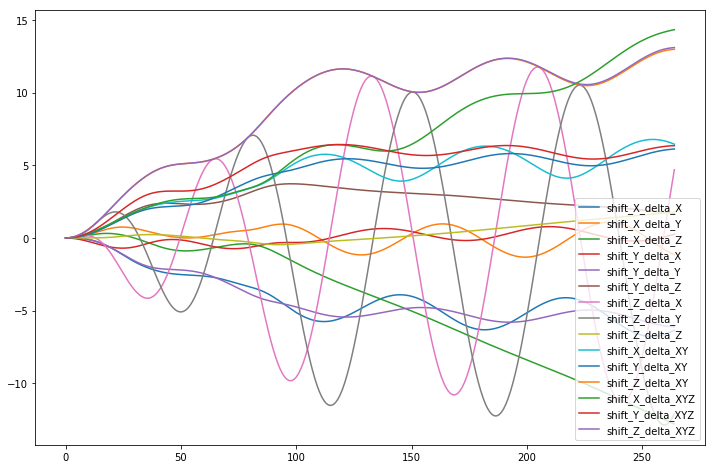

In [161]:
df_deltas.plot()

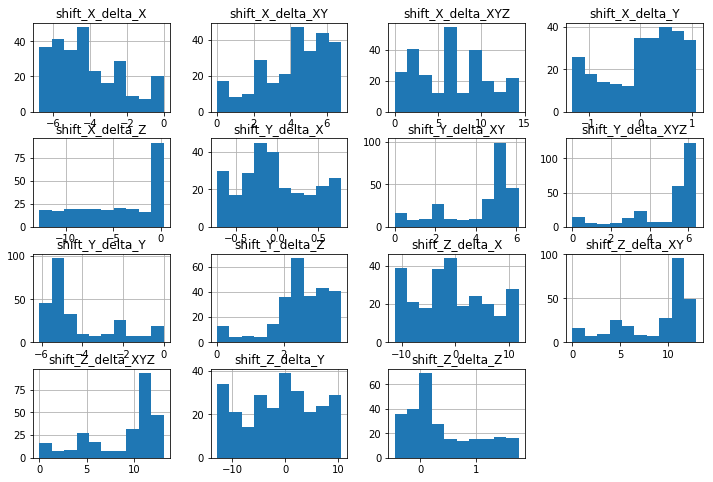

In [131]:
df_deltas.hist();

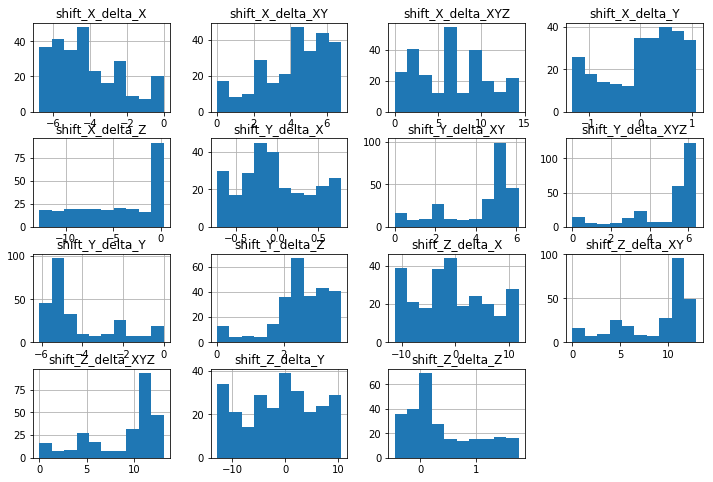

In [149]:
axs = df_deltas.hist()

In [154]:
ax = axs[0]

In [157]:
ax[0].

TypeError: 'AxesSubplot' object is not callable

In [153]:
axs[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0f73e4278>,
      dtype=object)

In [139]:
plt.savefig(fig, plot_dir+"test.pdf")

TypeError: savefig() takes 2 positional arguments but 3 were given

<Figure size 864x576 with 0 Axes>